<a href="https://colab.research.google.com/github/majuhdl/tg/blob/main/ENN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#Import scikit-learn dataset library
from sklearn import datasets
import numpy as np

#Load dataset
iris = datasets.load_iris()

X = np.array([[1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000], [1000000000, 100000000000, 1000000000, 1000000000]])
Y = [10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000, 10000000000000]

iris['data'] = np.vstack([iris['data'], X])
iris['target'] = np.hstack([iris['target'], Y])

print(iris)

{'data': array([[5.1e+00, 3.5e+00, 1.4e+00, 2.0e-01],
       [4.9e+00, 3.0e+00, 1.4e+00, 2.0e-01],
       [4.7e+00, 3.2e+00, 1.3e+00, 2.0e-01],
       [4.6e+00, 3.1e+00, 1.5e+00, 2.0e-01],
       [5.0e+00, 3.6e+00, 1.4e+00, 2.0e-01],
       [5.4e+00, 3.9e+00, 1.7e+00, 4.0e-01],
       [4.6e+00, 3.4e+00, 1.4e+00, 3.0e-01],
       [5.0e+00, 3.4e+00, 1.5e+00, 2.0e-01],
       [4.4e+00, 2.9e+00, 1.4e+00, 2.0e-01],
       [4.9e+00, 3.1e+00, 1.5e+00, 1.0e-01],
       [5.4e+00, 3.7e+00, 1.5e+00, 2.0e-01],
       [4.8e+00, 3.4e+00, 1.6e+00, 2.0e-01],
       [4.8e+00, 3.0e+00, 1.4e+00, 1.0e-01],
       [4.3e+00, 3.0e+00, 1.1e+00, 1.0e-01],
       [5.8e+00, 4.0e+00, 1.2e+00, 2.0e-01],
       [5.7e+00, 4.4e+00, 1.5e+00, 4.0e-01],
       [5.4e+00, 3.9e+00, 1.3e+00, 4.0e-01],
       [5.1e+00, 3.5e+00, 1.4e+00, 3.0e-01],
       [5.7e+00, 3.8e+00, 1.7e+00, 3.0e-01],
       [5.1e+00, 3.8e+00, 1.5e+00, 3.0e-01],
       [5.4e+00, 3.4e+00, 1.7e+00, 2.0e-01],
       [5.1e+00, 3.7e+00, 1.5e+00, 4.0e-01],
 

In [55]:
import typing as t

class Filter:
    """Base class for all the implemented class noise filters.
    Attributes
    ----------
    rem_indx : :obj:`List`
        Removed indexes (rows) from the dataset after the filtering.
    parameters : :obj:`Dict`
        Parameters used to define the behaviour of the filter.
    clean_data : :obj:`Sequence`
        Filtered independent attributes(X) of the dataset.
    clean_classes : :obj:`Sequence`
        Filtered target attributes(y) of the dataset.
    """

    def __init__(self, parameters: t.Dict):
        """
        Parameters
        ----------
        parameters : :obj:`Dict`
            Dictionary that provides hyperparameters for filters algorithms.
        """
        # Removed Indexes
        self.rem_indx: t.List = []
        self.parameters = parameters

    def set_cleanData(self, attributes: t.Sequence, labels: t.Sequence) -> t.NoReturn:
        """Helper function to set data and classes to Filter instance.
        Parameters
        ----------
        data : :obj:`Sequence`
            Filtered independent attributes(X) of the dataset.
        classes : :obj:`Sequence`
            Filtered target attributes(y) of the dataset.
        """
        self.clean_data = attributes
        self.clean_classes = labels

In [63]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import typing as t

class ENN:
    print("in")
    def __init__(self):
        print("hello")
        self.max_neighbours = 3
        self.filter = Filter(parameters = {"neighbors" : 3})
        self.n_jobs = -1
        print("hello1")

    def __call__(self, data: t.Sequence, classes: t.Sequence):
        print(data.size)
        print(classes.size)
        self.isNoise = np.array([False] * len(classes))
        self.clf = KNeighborsClassifier(n_neighbors = 3, n_jobs = -1)
        list_final = list(range(0, len(data)))
        for indx in list_final:
          print(data.size)
          x = np.delete(data, indx, axis = 0)
          print(x.size)
          print(classes.size)
          y = np.delete(classes, indx, axis = 0)
          print(y.size)
          self.clf.fit(x, y)
          predict = self.clf.predict([data[indx]]).reshape(1, -1)
          self.isNoise[indx] = predict
        
        self.filter.rem_indx = np.argwhere(self.isNoise)
        notNoise = np.argwhere(self.isNoise)
        self.filter.set_cleanData(data[notNoise], classes[notNoise])

        return self.filter


print("aaa")
enn=ENN()
filter = enn(iris.data, iris.target)
print("clf", filter.clean_classes)

print("filter", filter.clean_data)
print("filter", filter.parameters)

print("max", filter.rem_indx)

in
aaa
hello
hello1
648
162
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162
161
648
644
162


In [67]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
print(filter)
data=pd.DataFrame({
    'sepal length':filter.clean_data[:,0],
    'sepal width':filter.clean_data[:,1],
    'petal length':filter.clean_data[:,2],
    'petal width':filter.clean_data[:,3],
    'species':filter.clean_classes
})
data.head()

print(data)

IndexError: ignored

In [61]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

print(X)
print(y)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

    sepal length  sepal width  petal length  petal width
0            5.1          3.5           1.4          0.2
1            4.9          3.0           1.4          0.2
2            4.7          3.2           1.3          0.2
3            4.6          3.1           1.5          0.2
4            5.0          3.6           1.4          0.2
5            5.4          3.9           1.7          0.4
6            4.6          3.4           1.4          0.3
7            5.0          3.4           1.5          0.2
8            4.4          2.9           1.4          0.2
9            4.9          3.1           1.5          0.1
10           5.4          3.7           1.5          0.2
11           4.8          3.4           1.6          0.2
12           4.8          3.0           1.4          0.1
13           4.3          3.0           1.1          0.1
14           5.8          4.0           1.2          0.2
15           5.7          4.4           1.5          0.4
16           5.4          3.9  

In [62]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

print(clf)

y_pred=clf.predict(X_test)

RandomForestClassifier()


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Accuracy: 1.0


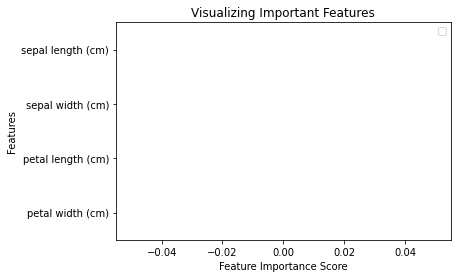

In [60]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

species_idx = clf.predict([[3, 5, 4, 2]])[0]
iris.target_names[species_idx]

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()